In [ ]:
# To improve training loss, that is, lower training loss, we can:
# (i) we can increase or decrease learning rate
# (ii) we can increase batch size

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
train_images.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = keras.optimizers.RMSprop(1.),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

history_large_learning_rate_model = model.fit(train_images, train_labels, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3953 - loss: 3058.7153 - val_accuracy: 0.1816 - val_loss: 2.2332
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1817 - loss: 5.7280 - val_accuracy: 0.1444 - val_loss: 2.2953
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1526 - loss: 2.6443 - val_accuracy: 0.2303 - val_loss: 2.0370
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2097 - loss: 2.3545 - val_accuracy: 0.1917 - val_loss: 2.0852
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1940 - loss: 2.3577 - val_accuracy: 0.2055 - val_loss: 2.2719
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2003 - loss: 2.5079 - val_accuracy: 0.1613 - val_loss: 2.3248
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1981 - loss: 2.3267 - val_accuracy: 0.2037 - val_loss: 2.1033
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2139 - loss: 2.2977 - val_accuracy:

In [ ]:
history_dict = history_large_learning_rate_model.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

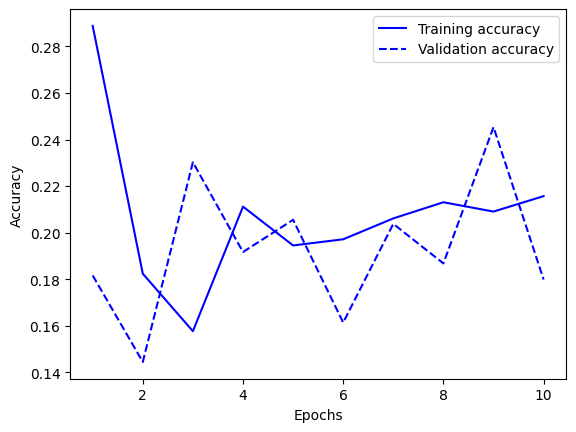

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, acc, 'b-', label = "Training accuracy")
plt.plot(epochs, val_acc, 'b--', label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# The model quickly reaches a training and validation accuracy in the 30-40% range, but cannot get past that.

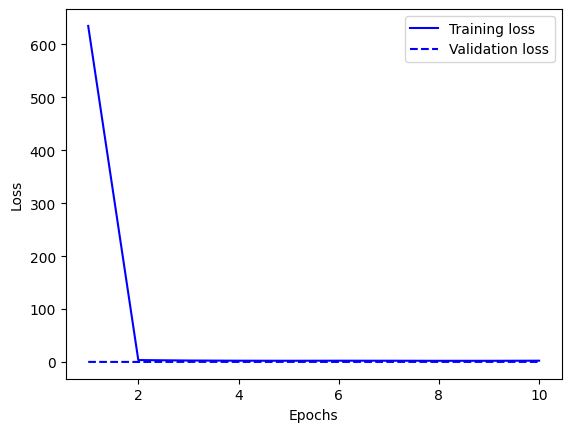

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss, 'b-', label = "Training loss")
plt.plot(epochs, val_acc, 'b--', label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# The model's training loss is stalled

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = keras.optimizers.RMSprop(1e-2),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

history_small_learning_rate_model = model.fit(train_images, train_labels, epochs = 10, batch_size = 256, validation_split = 0.2)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7828 - loss: 1.2153 - val_accuracy: 0.9482 - val_loss: 0.1747
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9612 - loss: 0.1266 - val_accuracy: 0.9689 - val_loss: 0.1066
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.0817 - val_accuracy: 0.9715 - val_loss: 0.1066
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9816 - loss: 0.0583 - val_accuracy: 0.9757 - val_loss: 0.0986
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9864 - loss: 0.0457 - val_accuracy: 0.9720 - val_loss: 0.1256
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0428 - val_accuracy: 0.9735 - val_loss: 0.1196
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0401 - val_accuracy: 0.9705 - val_loss: 0.1529
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0355 - val_accuracy: 0

In [ ]:
history_small_dict = history_small_learning_rate_model.history

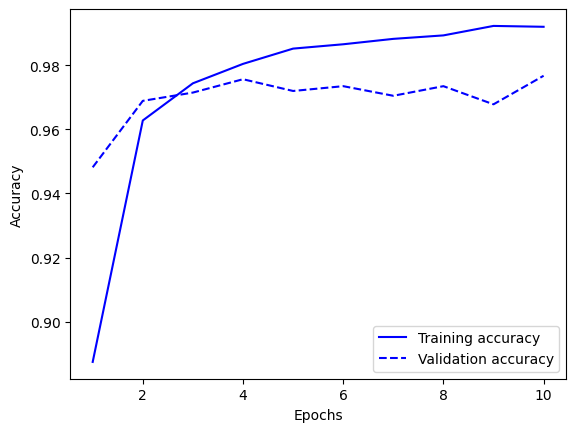

In [ ]:
acc = history_small_dict['accuracy']
val_acc = history_small_dict['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, acc, 'b-', label = "Training accuracy")
plt.plot(epochs, val_acc, 'b--', label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

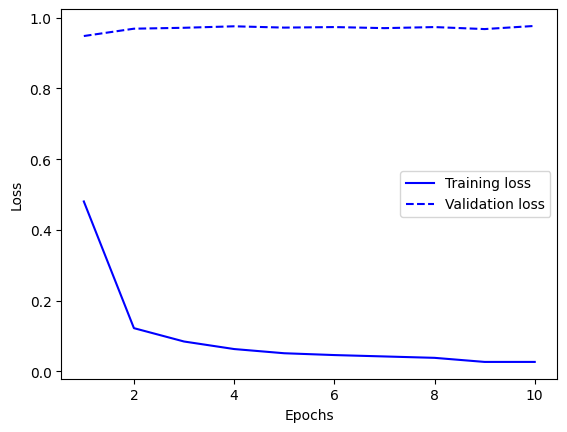

In [ ]:
loss = history_small_dict['loss']
val_loss = history_small_dict['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss, 'b-', label = "Training loss")
plt.plot(epochs, val_acc, 'b--', label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# If training loss is going down but validation metrics aren't improving
# (i) Problem is incorrectly formulated
# (ii) Leverage better architecture prior